# Single layer perceptron

**Contents:**
1. [Perceptron for a line](#perceptron-for-a-line)
    * [SingleLayerPerceptron](#single-layer-perceptron)
    * [Line](#line)
    * [Training](#training-1)
2. [Perceptron for a n-dimentional hyperplane](#ndim)
    * [F](#F)
    * [Training](#training-2)
3. [Binary classification](#binary-classification)
    * [Group generation](#generate-group)
    * [Activation function](#activation-function)
    * [Training](#training-3)

## <a name='perceptron-for-a-line'>Perceptron for a line </a>

How does is work?
The perceptron represents a system of liniar eqations,for which we need to define coefficients. We do so using gradient.
It is not a theoretical document, so if you want more details, just google it.

At first, we need to import all the necessary packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In below code we describethe a class <a name='single-layer-perceptron'>`SingleLayerPerceptron`</a> that will manage all the processing. 

In [2]:
class SingleLayerPerceptron:
    def __init__(self, num_in, num_out, alpha=0.01):
        self.num_in = num_in
        self.num_out = num_out
        self.weights = np.random.random(num_in * num_out).reshape(num_in, num_out)
        self.T = np.random.random(num_out)
        self.alpha = alpha
        self.X = None
    
    def forward(self, X):
        assert len(X) == self.num_in
        self.X = X
        Y = [0] * self.num_out
        for j in range(self.num_out):
            for i in range(self.num_in):
                Y[j] += X[i] * self.weights[i, j]
            Y[j] -= self.T
        
        return Y
    
    def backprop(self, error):
        # adaptive alpha
        # self.alpha = 1 / (1 + sum([x ** 2 for x in self.X]))
        if self.X is None:
            return
        for j in range(self.num_out):
            for i in range(self.num_in):
                self.weights[i, j] -= self.alpha * self.X[i] * error[j]
            self.T[j] += self.alpha * error[j]

This class has the methods `forward(...)` and `backprop(...)`. The first one get a sample as input and generate output using weigths and bias. `backprop(...)` updates weights and biases of the net. 

Another class <a name='line'>`Line`</a> will help us to generate values for a line with given *a* and *b* parameters.

In [3]:
class Line:
    def __init__(self, a, b):
        self.a = a
        self.b = b
    
    def __call__(self, x):
        return self.a * x + self.b
    
    def get(self, X):
        return [self.__call__(x) for x in X]

The line will correspond to the following formala

$$ y = a x + b $$

Now let's demonstrate how we can use it.

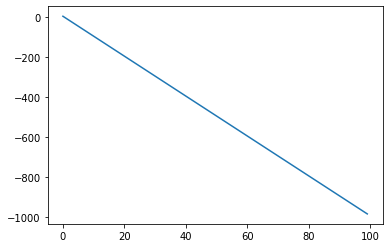

In [4]:
line = Line(a=-10, b=5)
test_line_points = line.get(range(100))
plt.plot(test_line_points)
plt.show()

As we thought, this is line :)

In [5]:
slp = SingleLayerPerceptron(num_in=1, num_out=1, alpha=0.0001)

The above line of code creates an instance of [`SingleLayerPerceptron`](#single-layer-perceptron) class.

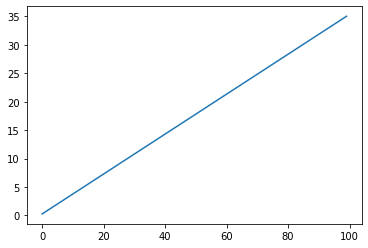

In [6]:
points_from_perceptron = Line(slp.weights[0][0], slp.T[0]).get(range(100))
plt.plot(points_from_perceptron)
plt.show()

If we plot line with `a` = `weights[0][0]` and `b` = `T[0]` we will receive a line that the given perceptron generate (picture above). It's because perceptron uses the formula

$$y_{j} = \sum_{i = 1}^{num\_in} w_{ij} x_{i} + T_{j}$$

Ok, now we can generate training and test sets. After that we can finally <a name='training-1'>train</a> our perceptron and estimate its accuracy.

Total test error before training: [32913.92041876]
Start error: [-5.27793822]
Final error: [0.01738717]
Total test error after training: [7.60907051]


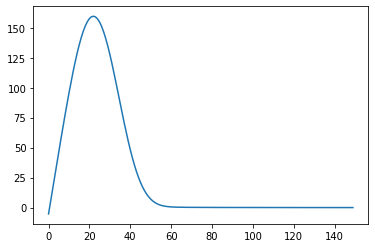

In [7]:
train_set = np.arange(0, 150)
test_set = np.arange(150, 170)


def test():
    '''
    This function is called to estimate
    total error from test_set
    
    retval: total error from test set
    '''
    test_errors = []
    for x in test_set:
        y = slp.forward([x])
        error = y[0] - line(x) 
        test_errors.append(error)
    return sum(test_errors)
    

# estimation of error before training
print('Total test error before training: {}'.format(test()))

    
# training
errors = []
for x in train_set:
    y = slp.forward([x])
    error = y[0] - line(x)
    errors.append(error)
    slp.backprop([error])

print('Start error: {}'.format(errors[0]))
print('Final error: {}'.format(errors[-1]))


# estimation of error after training
print('Total test error after training: {}'.format(test()))


plt.plot(errors)
plt.show()

As we can see, model has trained so that total error from test set has became really low regarding start error value.

Let's now plot actual line and line, generated with perceptron.

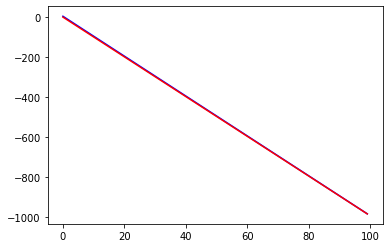

In [8]:
plt.plot(line.get(range(100)), color='blue')
plt.plot(Line(slp.weights[0][0], slp.T[0]).get(range(100)), color='red')
plt.show()

Red line is maid by perceptron. Blue one is actual line. They are almost collinear

## <a name='ndim'>Perceptron for a n-dimentional hyperplane </a>

Let's now define a bit sophisticated example. Now we'll have linear <a name='F'>function</a> that gets sample of arbitrary assigned size (e.g. 100) and uses randomly generated coefficients to calculate result. The final formula:

$$y = \sum_{i = 1}^{size} c_{i} x_{i} + c_{size - 1}$$

In [9]:
class F:
    def __init__(self, size=100):
        self.size = size
        self.coeffs = np.random.random(size+1,)
    
    def __call__(self, X):
        assert len(X) == self.size
        y = self.coeffs[-1]
        y += sum(x * c for x, c in zip(X, self.coeffs))
        return y

The above class defines a function that we describe before. It gets some sample and generates result based on it.

In [10]:
f = F(size=10)
x = np.random.random(f.size)
print('f: {}...{} -> {:.3f}'.format(x[0:2], x[-2:], f(x)))

f: [0.9624674  0.00861855]...[0.36271963 0.63354768] -> 4.137


Now we can finally <a name='training-2'>train</a> our perceptron and estimate results.

Total error of 20 test samples: [[31.73490314]]
Error per sample: [[1.58674516]]
Total error of 20 test samples: [[1.58750511]]
Error per sample: [[0.07937526]]


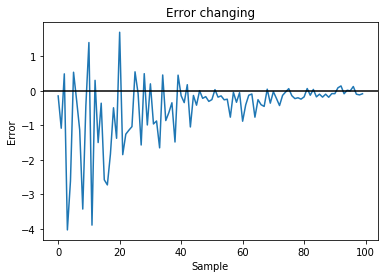

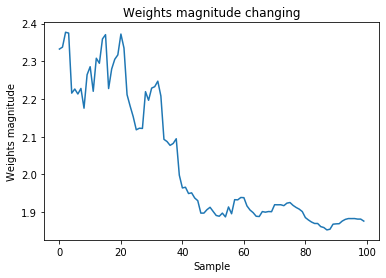

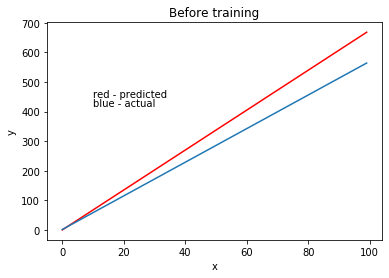

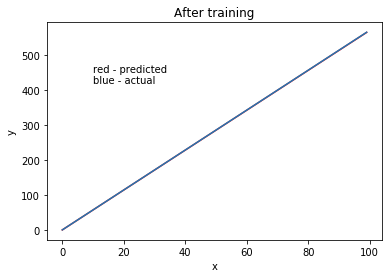

In [11]:
slp = SingleLayerPerceptron(num_in=f.size, num_out=1, alpha=0.03)


def test():
    '''
    This funciton is supposed to 
    calculate error on test set
    and then show results
    '''
    test_errors = []
    for x in test_set:
        error = abs(slp.forward(x) - f(x))
        test_errors.append(error)
    print('Total error of {} test samples: {}'.format(len(test_set), sum(test_errors)))
    print('Error per sample: {}'.format(sum(test_errors) / len(test_set)))


# sets for visualization
X_check = [[x]*f.size for x in range(100)]
Y_actual = [f(x) for x in X_check]
Y_slp_origin = [slp.forward(x)[0] for x in X_check]

# training and testing sets
train_set_size, test_set_size = 100, 20
train_set = [(np.random.random(f.size) - 0.5) * 5 for _ in range(train_set_size)]
test_set = [(np.random.random(f.size) - 0.5) * 5 for _ in range(train_set_size, train_set_size + test_set_size)]

# testing before training
test()

# training
errors = []
weights_dynamic = []
for x in train_set:
    weights_dynamic.append(np.linalg.norm(slp.weights))
    y = slp.forward(x)[0]
    error = y - f(x)
    errors.append(error)
    slp.backprop([error])
    
# testing after training
test()

# visualization of weights and error dynamic
plt.plot(errors)
plt.title('Error changing')
plt.xlabel('Sample')
plt.ylabel('Error')
plt.axhline(y=0, color='black')
plt.show()

plt.plot(weights_dynamic)
plt.title('Weights magnitude changing')
plt.xlabel('Sample')
plt.ylabel('Weights magnitude')
plt.show()


# visualization of states (before training and after training)
Y_slp_final = [slp.forward(x)[0] for x in X_check]
plt.plot(Y_slp_origin, color='red')
plt.plot(Y_actual)
plt.title('Before training')
plt.xlabel('x')
plt.ylabel('y')
plt.text(10, 450, 'red - predicted')
plt.text(10, 420, 'blue - actual')
plt.show()

plt.plot(Y_slp_final, color='red')
plt.plot(Y_actual)
plt.title('After training')
plt.xlabel('x')
plt.ylabel('y')
plt.text(10, 450, 'red - predicted')
plt.text(10, 420, 'blue - actual')
plt.show()

## <a name='binary-classification'>Binary classification</a>

Description: we have 2 groups of elements that could be separated by line. The goal is to find appropriate pair of parameters **(a, b)** for that line. To remind, the line can be represented with following formula:

$$ y = a x + b $$

Before we start training perceptron, we must take care of groups, for which we will train our model. For this purpose I wrote the <a name='generate-group'>function</a>:

In [12]:
def generate_group(loc, max_dist, size):
    '''
    loc - tuple, location of center
    max_dist - maximal distance from ceter of group
    size - number of dots
    
    retval - array of dots [x, y]
    '''
    
    X = [loc[0] + np.random.rand() * max_dist for _ in range(size)]
    Y = [loc[1] + np.random.rand() * max_dist for _ in range(size)]
    group = [[x, y] for x, y in zip(X, Y)]
    return group    

This function gets ceter coordinates of group and maximal distance from center. It generates group in defined area of size, passed as 3rd parameter. Now we're able to generate 2 groups for later use.

In [13]:
g1 = generate_group(loc=(10, 10), max_dist=10, size=25)
g2 = generate_group(loc=(20, 20), max_dist=10, size=20)

Let's see how it looks on a plot.

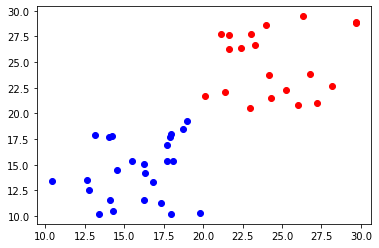

In [14]:
g1 = np.array(g1)
g2 = np.array(g2)
plt.plot(g1[:, 0], g1[:, 1], marker='o', linestyle=' ', color='blue')
plt.plot(g2[:, 0], g2[:, 1], marker='o', linestyle=' ', color='red')
plt.show()

Great! Now we have dataset. So what do we next? The most obvious answer: train the model. But at first, let's take a look at goal.

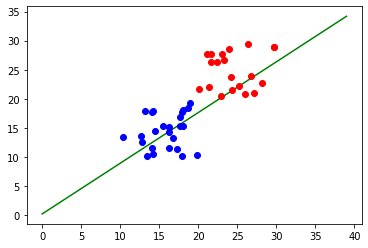

In [15]:
a, b = np.random.rand(), np.random.rand()
test_points_for_line = Line(a, b).get(range(40))
plt.plot(test_points_for_line, color='green')
plt.plot(g1[:, 0], g1[:, 1], marker='o', linestyle=' ', color='blue')
plt.plot(g2[:, 0], g2[:, 1], marker='o', linestyle=' ', color='red')
plt.show()

The goal is to move green line in between *blue* and *red* teams. Every team has color, but for training a model we need to encode the colors into numbers. Say, blue is 0 and red is 1.

We also need to modify our perceptron class, i. e. add <a name='activation-function'>acivation function</a>. It will be binary activation function:

$$ f(S) =\begin{cases} 
        1, S > 0 \\
        0, S \le 0
        \end{cases} $$

In [16]:
class SingleLayerPerceptron:
    def __init__(self, num_in, num_out, alpha=0.01):
        self.num_in = num_in
        self.num_out = num_out
        self.weights = np.random.random(num_in * num_out).reshape(num_in, num_out)
        self.T = np.random.random(num_out)
        self.alpha = alpha
        self.X = None
    
    def forward(self, X):
        assert len(X) == self.num_in
        self.X = X
        Y = [0] * self.num_out
        for j in range(self.num_out):
            for i in range(self.num_in):
                Y[j] += X[i] * self.weights[i, j]
            Y[j] -= self.T[j]
                
        # activation
        for i in range(len(Y)):
            Y[i] = 1 if Y[i] > 0 else 0
        return Y
    
    def backprop(self, error):
        # adaptive alpha
        # self.alpha = 1 / (1 + sum([x ** 2 for x in self.X]))
        if self.X is None:
            return
        for j in range(self.num_out):
            for i in range(self.num_in):
                self.weights[i, j] -= self.alpha * self.X[i] * error[j]
            self.T[j] += self.alpha * error[j]

Code below is pretty dirty <a name='training-3'>solution</a> and it works unstable. But it works sometimes:)
### Training strategy:
1. Train model on set with responses 0
2. Train mode alternately (one time 0, next time 1)
2. Train on shuffled dataset

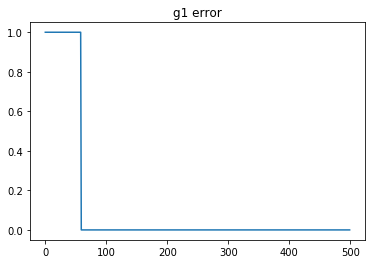

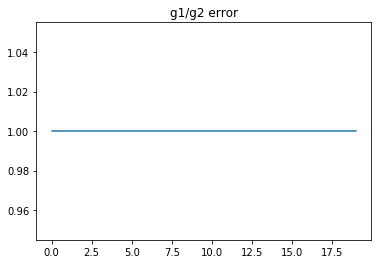

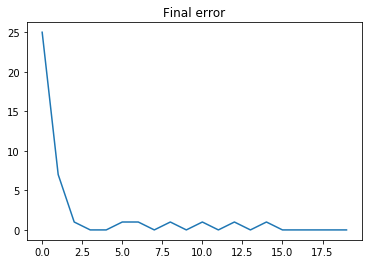

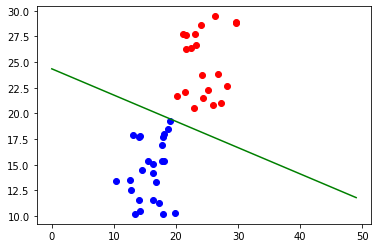

In [21]:
slp = SingleLayerPerceptron(num_in=2, num_out=1, alpha=0.001)

# merge groups and generate
# array that contains responses
# for those groups
g_merged = np.array(g1.tolist() + g2.tolist())
responses_for_merged = np.array([0] * len(g1) + [1] * len(g2))


# at first, train on set #1
errors_for_g1 = []
for epoch in range(20):
    for x in g1:
        y = slp.forward(x)[0]
        error = y - 0
        errors_for_g1.append(error)
        slp.backprop([error])
    
plt.plot(errors_for_g1)
plt.title('g1 error')
plt.show()
    

# then train in chess style, i. e. [1, 0, 1, 0, 1]
# everytime from different sets
errors_for_g1_g2 = []
for epoch in range(1):
    for x1,  x2 in zip(g1, g2):
        y1 = slp.forward(x1)[0]
        error1 = y - 0
        slp.backprop([error1])
        y2 = slp.forward(x2)[0]
        error2 = y - 1
        slp.backprop([error2])
        errors_for_g1_g2.append(np.linalg.norm([error1, error2]))
        
plt.plot(errors_for_g1_g2)
plt.title('g1/g2 error')
plt.show()
    
        
# and finally train on merged and shuffled set
errors = []
for epoch in range(20):
    errors_for_epoch = []
    for x, t in zip(g_merged, responses_for_merged):
        y = slp.forward(x)[0]
        error = y - t
        errors_for_epoch.append(error)
        slp.backprop([error])
    errors.append(sum(errors_for_epoch))

plt.plot(errors)
plt.title('Final error')
plt.show()
    

f = lambda x: (slp.T[0] - slp.weights[0][0] * x) / slp.weights[1][0]
Y = [f(x) for x in range(50)]
plt.plot(g1[:, 0], g1[:, 1], marker='o', linestyle=' ', color='blue')
plt.plot(g2[:, 0], g2[:, 1], marker='o', linestyle=' ', color='red')
plt.plot(Y, color='green')
plt.show()
    